<h1>Proyecto interciclo</h1>
<p><strong>TÍTULO PRÁCTICA:</strong> Redes Neuronales Problemas Multilabel</p>
<ul>
<li>Yansa </li>
<li>Andres Llivichusca</li>
<li>Pablo Marquez</li>
<li>Jonnathan Saquicela</li>
</ul>

**Descargar doc JSON**

In [69]:
import os
import requests
import zipfile

# URL del archivo y nombre local
url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
local_zip = "annotations_trainval2017.zip"
extract_folder = "annotations"

if os.path.exists(extract_folder):
    print("La carpeta 'annotations' ya existe. No se realizará ninguna acción.")
else:
    # Descargar el archivo ZIP
    print("Descargando el archivo...")
    response = requests.get(url)
    with open(local_zip, "wb") as f:
        f.write(response.content)

    # Extraer el archivo ZIP
    print("Extrayendo el archivo...")
    with zipfile.ZipFile(local_zip, "r") as zip_ref:
        zip_ref.extractall(extract_folder)

    # Limpiar el archivo ZIP descargado
    os.remove(local_zip)
    print("¡Descarga y extracción completadas!")


La carpeta 'annotations' ya existe. No se realizará ninguna acción.


**Clases**

In [70]:
import json

# Ruta al archivo JSON
file_path = "annotations/annotations/instances_train2017.json"

# Cargar el archivo JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Obtener las categorías y sus supercategorías
categories = data.get("categories", [])

# Imprimir cada categoría con su supercategoría de forma enumerada
print("Categorías y sus supercategorías:")
for i, category in enumerate(categories, 1):
    print(f"{i}. Categoría: {category['name']}, Supercategoría: {category['supercategory']}")

Categorías y sus supercategorías:
1. Categoría: person, Supercategoría: person
2. Categoría: bicycle, Supercategoría: vehicle
3. Categoría: car, Supercategoría: vehicle
4. Categoría: motorcycle, Supercategoría: vehicle
5. Categoría: airplane, Supercategoría: vehicle
6. Categoría: bus, Supercategoría: vehicle
7. Categoría: train, Supercategoría: vehicle
8. Categoría: truck, Supercategoría: vehicle
9. Categoría: boat, Supercategoría: vehicle
10. Categoría: traffic light, Supercategoría: outdoor
11. Categoría: fire hydrant, Supercategoría: outdoor
12. Categoría: stop sign, Supercategoría: outdoor
13. Categoría: parking meter, Supercategoría: outdoor
14. Categoría: bench, Supercategoría: outdoor
15. Categoría: bird, Supercategoría: animal
16. Categoría: cat, Supercategoría: animal
17. Categoría: dog, Supercategoría: animal
18. Categoría: horse, Supercategoría: animal
19. Categoría: sheep, Supercategoría: animal
20. Categoría: cow, Supercategoría: animal
21. Categoría: elephant, Supercatego

**pedir id de imagen**

In [71]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Crear una función para mostrar una imagen y sus detalles
def visualizar_imagen(image_id, image_dir="train2017 (1)\\train2017"):
    # Buscar la imagen por ID
    image_info = next((img for img in data["images"] if img["id"] == image_id), None)
    if not image_info:
        print(f"No se encontró la imagen con ID {image_id}.")
        return

    # Obtener la ruta de la imagen
    file_name = image_info["file_name"]
    image_path = os.path.join(image_dir, file_name)

    # Mostrar información de la imagen
    print(f"ID de la imagen: {image_info['id']}")
    print(f"Nombre del archivo: {image_info['file_name']}")
    print(f"Dimensiones: {image_info['width']}x{image_info['height']}")

    # Buscar las categorías a las que pertenece la imagen
    # Filtramos las anotaciones de la imagen específica
    image_annotations = [ann for ann in data["annotations"] if ann["image_id"] == image_id]
    
    # Obtener los nombres de las categorías correspondientes y eliminar duplicados
    image_categories = list(set(categories[ann["category_id"]] for ann in image_annotations if ann["category_id"] in categories))

    # Mostrar las categorías de la imagen
    if image_categories:
        print(f"Categorías de la imagen: {', '.join(image_categories)}")
    else:
        print("No se encontraron categorías para esta imagen.")
    
    # Mostrar la imagen
    if os.path.exists(image_path):
        print(f"Ruta completa de la imagen: {os.path.abspath(image_path)}")
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Imagen ID: {image_id}")
        plt.show()
    else:
        print(f"La imagen no se encuentra en la ruta especificada: {os.path.abspath(image_path)}")




ID de la imagen: 257
Nombre del archivo: 000000000257.jpg
Dimensiones: 640x480
Categorías de la imagen: traffic light, person, handbag, truck, backpack
Ruta completa de la imagen: c:\Users\Jonna\Desktop\ups\6to ciclo\IA\examen_interciclo\train2017\000000000257.jpg


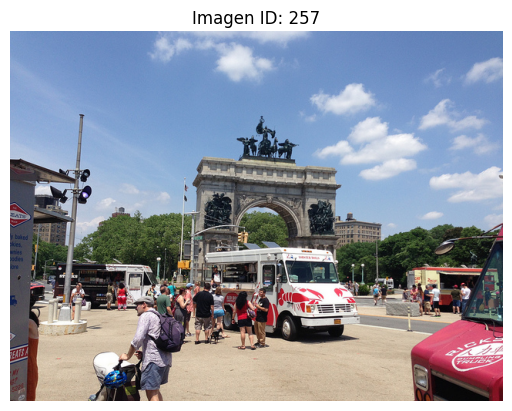

In [72]:
# Solicitar al usuario un ID de imagen
image_id = int(input("Ingrese el ID de la imagen que desea visualizar: "))
visualizar_imagen(image_id, image_dir="train2017")

**Diagrama de frecuencia**

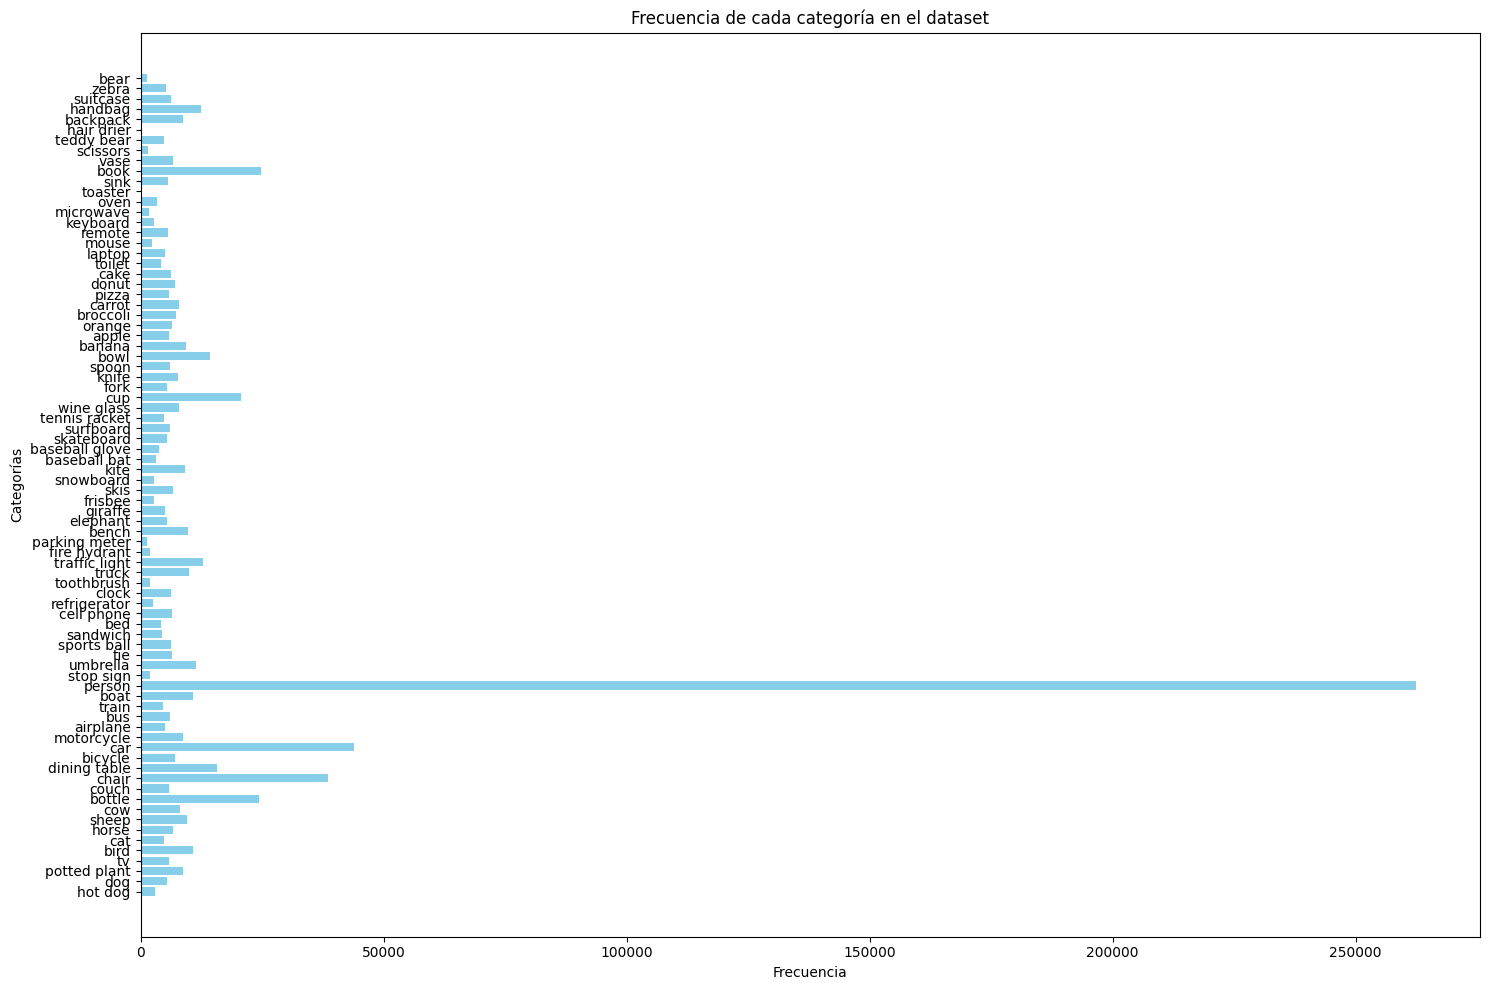

In [73]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Contar la frecuencia de cada categoría en las anotaciones
category_ids = [ann["category_id"] for ann in data["annotations"]]
category_names = [categories[cat_id] for cat_id in category_ids]

# Contar las ocurrencias de cada categoría
category_counts = Counter(category_names)

# Preparar los datos para el gráfico
categories_list = list(category_counts.keys())
counts_list = list(category_counts.values())

# Crear un gráfico de barras
plt.figure(figsize=(15, 10))
plt.barh(categories_list, counts_list, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')
plt.title('Frecuencia de cada categoría en el dataset')

# Rotar las etiquetas del eje Y para mejorar la legibilidad
plt.yticks(rotation=0)

# Ajustar el diseño para evitar el solapamiento de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Relaciones entre categorias**

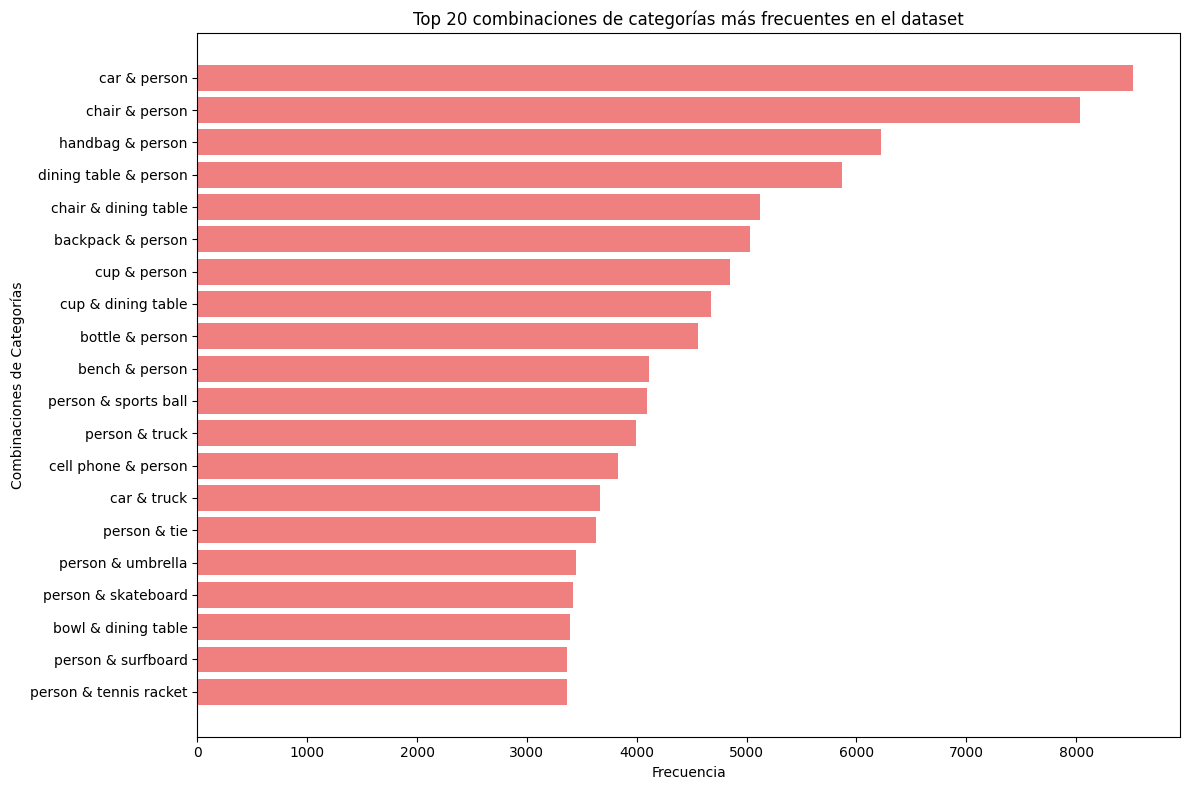

In [74]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Crear un diccionario para las anotaciones por imagen
image_annotations = {}

# Llenar el diccionario con las categorías por cada imagen
for ann in data["annotations"]:
    image_id = ann["image_id"]
    category_name = categories[ann["category_id"]]
    
    if image_id not in image_annotations:
        image_annotations[image_id] = set()
    
    image_annotations[image_id].add(category_name)

# Contar las combinaciones de categorías en cada imagen
combinations_count = Counter()

for categories_in_image in image_annotations.values():
    # Generar todas las combinaciones posibles de categorías, asegurando un orden fijo
    for combo in combinations(sorted(categories_in_image), 2):  # Combinaciones de 2 categorías
        combinations_count[combo] += 1

# Preparar los datos para el gráfico
combos_list = list(combinations_count.keys())
counts_list = list(combinations_count.values())

# Ordenar combinaciones por frecuencia en orden descendente
sorted_combos = sorted(zip(combos_list, counts_list), key=lambda x: x[1], reverse=True)

# Seleccionar las 20 combinaciones más frecuentes (puedes ajustar este número)
top_combos = sorted_combos[:20]
top_combos, top_counts = zip(*top_combos)

# Crear un gráfico de barras para las combinaciones de categorías más frecuentes
plt.figure(figsize=(12, 8))
plt.barh([' & '.join(combo) for combo in top_combos], top_counts, color='lightcoral')
plt.xlabel('Frecuencia')
plt.ylabel('Combinaciones de Categorías')
plt.title('Top 20 combinaciones de categorías más frecuentes en el dataset')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las combinaciones más frecuentes primero
plt.tight_layout()
plt.show()


<hr>
<h3>Procesamiento de datos</h3>

In [75]:
import pandas as pd
import numpy as np
import os

# Cargar datos del archivo JSON
file_path = "annotations/annotations/instances_train2017.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Extraer categorías y sus nombres
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Crear un DataFrame para las anotaciones de imágenes
annotations = data["annotations"]
images = data["images"]

In [76]:
# Crear un diccionario para las categorías de cada imagen
image_categories = {}
for ann in annotations:
    image_id = ann["image_id"]
    category_id = ann["category_id"]
    if image_id not in image_categories:
        image_categories[image_id] = []
    image_categories[image_id].append(category_id)

In [77]:
# Crear un DataFrame estructurado
image_data = []
for img in images:
    image_id = img["id"]
    file_name = img["file_name"]
    width = img["width"]
    height = img["height"]
    labels = image_categories.get(image_id, [])
    label_vector = [1 if cat_id in labels else 0 for cat_id in categories.keys()]
    image_data.append({
        "image_id": image_id,
        "file_name": file_name,
        "width": width,
        "height": height,
        "labels": label_vector
    })

In [78]:
import pandas as pd
import os

# Nombre del archivo
file_name = "processed_image_data.csv"

# Verificar si el archivo ya existe
    # Convertir en un DataFrame
df = pd.DataFrame(image_data)

# Añadir nombres de categorías como columnas para claridad
category_names = [categories[cat_id] for cat_id in categories.keys()]
df_labels = pd.DataFrame(df["labels"].tolist(), columns=category_names)
df = pd.concat([df.drop("labels", axis=1), df_labels], axis=1)

if not os.path.exists(file_name):

    # Guardar el DataFrame estructurado en un archivo CSV para análisis rápido
    df.to_csv(file_name, index=False)
else:
    print(f"El archivo {file_name} ya existe. No se ejecutará el procesamiento.")


El archivo processed_image_data.csv ya existe. No se ejecutará el procesamiento.


In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import os

# Cargar el CSV procesado
data_path = "processed_image_data.csv"
df = pd.read_csv(data_path)

# Actualizar la columna "file_name" para que contenga las rutas completas a las imágenes
df["file_name"] = df["file_name"].apply(lambda x: os.path.join("train2017", x))

# Dividir características (X) y etiquetas (y)
X = df["file_name"].values  # Rutas completas de las imágenes
y = df.iloc[:, 4:].values   # Columnas de etiquetas (categorías)

# Dividir en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Conjunto de entrenamiento: {len(X_train)} imágenes")
print(f"Conjunto de validación: {len(X_val)} imágenes")
print(f"Conjunto de prueba: {len(X_test)} imágenes")


Conjunto de entrenamiento: 82800 imágenes
Conjunto de validación: 17743 imágenes
Conjunto de prueba: 17744 imágenes


In [80]:
df

,image_id,file_name,width,height,person,bicycle,car,motorcycle,airplane,bus,...,toaster,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush
0,391895,train2017\000000391895.jpg,640,360,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,522418,train2017\000000522418.jpg,640,480,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,184613,train2017\000000184613.jpg,500,336,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,318219,train2017\000000318219.jpg,556,640,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,554625,train2017\000000554625.jpg,426,640,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118282,444010,train2017\000000444010.jpg,640,480,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118283,565004,train2017\000000565004.jpg,640,427,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118284,516168,train2017\000000516168.jpg,640,480,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
118285,547503,train2017\000000547503.jpg,500,375,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<hr>
<h4>Visualizar imagen y sus categorías</h4>

Ruta de la imagen: train2017\000000152746.jpg
Nombre del archivo: train2017\000000152746.jpg
Categorías: person, car, tie


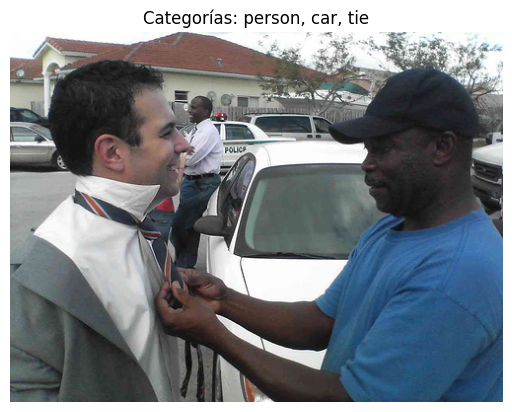

In [81]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# Seleccionar una imagen al azar del conjunto de entrenamiento
random_index = np.random.randint(0, len(X_train))
file_name = X_train[random_index]
labels = y_train[random_index]

# Verificar si la ruta es correcta
print(f"Ruta de la imagen: {file_name}")

# Visualizar la imagen y sus categorías
try:
    img = Image.open(file_name)  # Usamos solo el nombre del archivo si ya contiene la ruta correcta
    # Categorías activas (1s en el vector binario)
    active_categories = [category_names[i] for i, value in enumerate(labels) if value == 1]

    # Mostrar información
    print(f"Nombre del archivo: {file_name}")
    print(f"Categorías: {', '.join(active_categories)}")

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Categorías: {', '.join(active_categories)}")
    plt.show()

except FileNotFoundError as e:
    print(f"Error al abrir la imagen: {e}")


<h5>Visualizar imagen procesada</h5>

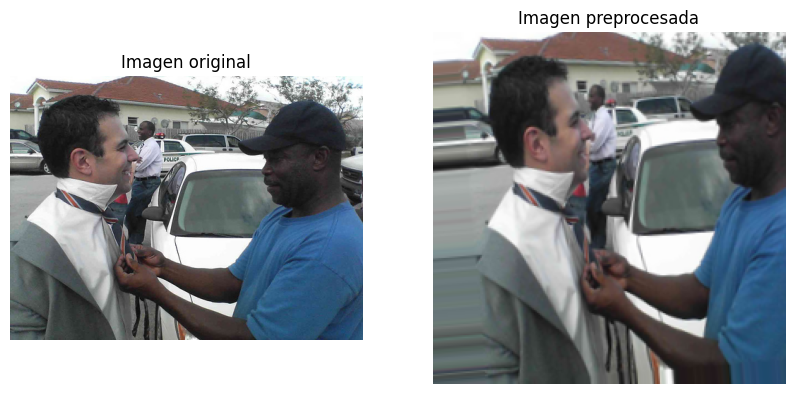

In [82]:
# Crear un generador para preprocesar imágenes
datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2)

# Cargar y procesar una imagen desde el generador
image_array = np.array(img.resize((224, 224)))  # Redimensionar manualmente
image_array = np.expand_dims(image_array, axis=0)  # Añadir dimensión batch
processed_image = next(datagen.flow(image_array, batch_size=1))[0]

# Visualizar la imagen original y preprocesada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].axis("off")
axes[0].set_title("Imagen original")

axes[1].imshow(processed_image)
axes[1].axis("off")
axes[1].set_title("Imagen preprocesada")

plt.show()


<hr>

In [83]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Definir la entrada (imágenes de 224x224)
input_shape = (224, 224, 3)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)


In [84]:
# Congelar capas de la base preentrenada
base_model.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
outputs = Dense(len(y_train[0]), activation="sigmoid")(x)  # Salida multilabel


In [85]:
# Crear el modelo
model = Model(inputs=base_model.input, outputs=outputs)

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [86]:
# Resumen del modelo
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,677,840 (94.14 MB)

 Trainable params: 1,090,128 (4.16 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

<hr>
<h2>Entrenamiento del modelo</h2>

In [87]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Normalizar etiquetas y convertirlas a arrays de NumPy
y_train = np.array(y_train, dtype=np.float32)  # Asegurar que sea un arreglo uniforme
y_val = np.array(y_val, dtype=np.float32)

# Crear DataFrames con etiquetas normalizadas
train_df = pd.DataFrame({"filepaths": X_train, "labels": list(y_train)})
val_df = pd.DataFrame({"filepaths": X_val, "labels": list(y_val)})

# Convertir las etiquetas en arrays de NumPy antes de pasarlas al generador
train_df["labels"] = train_df["labels"].apply(lambda x: np.array(x, dtype=np.float32))
val_df["labels"] = val_df["labels"].apply(lambda x: np.array(x, dtype=np.float32))

train_df["labels"] = train_df["labels"].map(np.array)
val_df["labels"] = val_df["labels"].map(np.array)


def custom_generator(generator):
    for X_batch, y_batch in generator:
        # Asegura que las etiquetas sean NumPy arrays homogéneos de float32
        y_batch = np.array([np.array(y, dtype=np.float32) for y in y_batch])
        yield X_batch, y_batch

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Solo normalización para validación



In [88]:
train_generator = custom_generator(
    train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col="filepaths",
        y_col="labels",
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw"
    )
)

val_generator = custom_generator(
    val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col="filepaths",
        y_col="labels",
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw"
    )
)


Found 82800 validated image filenames.
Found 17743 validated image filenames.


<h4>Verificar los datos generados</h4>

In [89]:
next(iter(train_generator))

(array([[[[0.32670608, 0.30966136, 0.23069622],
          [0.31928506, 0.31262484, 0.2316388 ],
          [0.4106092 , 0.4005274 , 0.31637365],
          ...,
          [0.39052626, 0.4112796 , 0.34430292],
          [0.3685049 , 0.38318017, 0.3072151 ],
          [0.3309847 , 0.35353196, 0.27470914]],
 
         [[0.29530537, 0.27667648, 0.19712844],
          [0.31669477, 0.30333704, 0.21803096],
          [0.38588616, 0.36407742, 0.2739317 ],
          ...,
          [0.38517767, 0.4040211 , 0.3259719 ],
          [0.35599387, 0.3681206 , 0.29346597],
          [0.3126526 , 0.3428382 , 0.26096   ]],
 
         [[0.22131728, 0.21515556, 0.13176976],
          [0.28669068, 0.27013537, 0.18410365],
          [0.39619502, 0.37657773, 0.29803845],
          ...,
          [0.37295625, 0.3887443 , 0.3122228 ],
          [0.3376617 , 0.35742685, 0.27971688],
          [0.3369001 , 0.35666   , 0.27430707]],
 
         ...,
 
         [[0.24050778, 0.22177643, 0.20290656],
          [0.33507

In [90]:
# Extraer un lote del generador para verificar
X_batch, y_batch = next(iter(train_generator))
print(f"Forma de X_batch: {X_batch.shape}, dtype: {X_batch.dtype}")
print(f"Forma de y_batch: {y_batch.shape}, dtype: {y_batch.dtype}")


Forma de X_batch: (32, 224, 224, 3), dtype: float32
Forma de y_batch: (32, 80), dtype: float32


In [91]:
for i, y in enumerate(y_batch):
    print(f"Etiqueta {i}: {y}, Tipo: {type(y)}")
    if i >= 5:  # Limita el número de impresiones
        break

Etiqueta 0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], Tipo: <class 'numpy.ndarray'>
Etiqueta 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], Tipo: <class 'numpy.ndarray'>
Etiqueta 2: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], Tipo: <class 'numpy.ndarray'>
Etiqueta 3: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [92]:
# Callbacks para entrenamiento
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        "best_model.keras",
        monitor="val_loss",
        save_best_only=True,
        mode="min"
    )
]

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
    146/Unknown 241s 2s/step - accuracy: 0.4865 - loss: 0.1965